 ## Подключение библиотек

In [18]:
# Проверка версии и пути к выбранному интерпретатору
import sys
print(f"Версия Python - {sys.version}")
print(f"Путь к интерпретатору Python - {sys.executable}")

Версия Python - 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
Путь к интерпретатору Python - C:\python\python.exe


In [19]:
# Python > 3.8
import pandas as pd
import numpy  as np

import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [20]:
import tensorflow as tf

In [21]:
import json

In [22]:
import pickle

In [23]:
# Проверка версий библиотек
for lib in [pd, np, sklearn, tf]:
    print(f"{lib.__name__:<12} {lib.__version__}")

pandas       2.2.2
numpy        1.26.4
sklearn      1.5.2
tensorflow   2.17.0


In [24]:
from IPython.display import clear_output

In [25]:
import plotly.graph_objects as go

In [26]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#tf.debugging.set_log_device_placement(False)
#tf.config.set_soft_device_placement(False)

Num GPUs Available:  0


## Объявление функций

Для повышения повторяемости кода и повышения уровня читаемости объявим несколько функций с уже знакомыми операциями

In [27]:
def PLOT34(y_test, y_pred) -> None:
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    plt.figure(figsize=(12,6))

    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1, color = "#17becf")
    plt.plot(  [ np.min(y_test), np.max(y_test) ], # x1,x2
               [ np.min(y_test), np.max(y_test) ], # y1,y2
               '--',
               alpha=0.7, lw=3, color = "black")
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')
    plt.grid()

    # == Диаграмма рассеяния ошибок ==
    # создать второе полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1, color = "#17becf")
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
    plt.grid()
#--------------------------------------------------------------------------

In [28]:
def GET_METRICS_SINGLE(y_test, y_pred) -> None:
    '''
    Вычисление и вывод метрик: MAE, RMSE, R2. Используются функции из библиотеки sklearn
    На основе сравнения проверочных и вычисленных.
    :param y_test: - проверочные значения целевой переменной
    :param y_pred: - вычисленные значения целевой переменной
    '''
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    mse  = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score                   (y_test, y_pred)

    print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
    print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
    print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
    print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))
#--------------------------------------------------------------------------

In [29]:
def my3dplot (  x_train: pd.DataFrame, y_train: pd.DataFrame,  isDrawTrain: bool,
                x_test:  pd.DataFrame, y_test: pd.DataFrame,    isDrawTest: bool,
                y_pred:  pd.DataFrame,            isDrawPred: bool,
                x1Name: str, x2Name: str, y_targetName: str,
                pointSize = 5,     # Размер точки
                pointTransparency  = 0.25, # Прозрачность точек графика train, test
                meshTransparency   = 0.5  # Прозрачность поверхности вычисленных значений y_pred
                ) -> None:
    """
    Отображает 3D график исходных и вычисленых точек
    x_test, y_test, x_train, y_train - обучающая и проверочная части исходной таблицы  (тип DataFrame)
    y_pred, - вычисленные значения (тип DataFrame)
    x1Name, x2Name - имя столбца для x1 и x2 (тип строковый)
    y_targetName   - имя столбца целевого    (тип строковый)
    """
    # Построить поверхность, соотвествующую вычисленным значениям
    trace_ModelPredicted = go.Mesh3d(
                       x= x_test[ x1Name ].values,
                       y= x_test[ x2Name ].values,
                       z= y_pred.reshape(-1), # <-- Вычисленные
                       name="Вычисленный",
                       opacity=meshTransparency,
                       #alphahull=1,
                       color='rgb(100,244,100)',  #  rgba(100,244,100, 0.6)
                      )

    # Построить рассеяние обучающих точек
    trace_Train = go.Scatter3d (x= x_train[ x1Name ].values, # <-- Обучающие
                                y= x_train[ x2Name ].values, # <-- Обучающие
                                z= y_train[ y_targetName ].values,     # <-- Обучающие
                                name="Обучающие",
                                mode='markers',
                                marker=dict(
                                    size=pointSize,
                                    color='#1f77b4', # Цвет точек <-- Проверочные
                                    # color=y_train[ y_targetName ].values, # Источник значений цвета <-- Обучающие
                                    # colorscale='Blues',        # Название цветовой шкалы # _r
                                    opacity=pointTransparency
                                ))

    # Построить рассеяние проверочных точек
    trace_Test = go.Scatter3d ( x= x_test[ x1Name ].values,# <-- Проверочные
                                y= x_test[ x2Name ].values,# <-- Проверочные
                                z= y_test[ y_targetName ].values,    # <-- Проверочные
                                name="Проверочные",
                                mode='markers',
                                marker=dict(
                                    size=pointSize,
                                    color='#ff7f0e', # Цвет точек <-- Проверочные
                                    # color=y_test[y_targetName].values, # Источник значений цвета <-- Проверочные
                                    # colorscale='Oranges',        # Название цветовой шкалы # _r
                                    opacity=pointTransparency
                               ))

    # Составить список элементов к отрисовке на графике
    ListForDraw = []
    if isDrawTrain: ListForDraw.append(trace_Train)
    if isDrawTest:  ListForDraw.append(trace_Test)
    if isDrawPred:  ListForDraw.append(trace_ModelPredicted)

    # Отрисовать все указанные элементы
    fig = go.Figure( data=ListForDraw)

    # Добавить подписи осей
    fig.update_layout(
        width=800,
        height=600,
        title='Завиcимость {} от ({}, {})'.format(y_targetName, x1Name, x2Name),
        scene=dict(
            xaxis_title=x1Name,
            yaxis_title=x2Name,
            zaxis_title=y_targetName,
        ),
    )
    fig.show()
#--------------------------------------------------------------------------

In [30]:
def printModelWeights(model):
  # Вывод структуры и значений весовых коэфф. нейросети по слоям
  for layer in model.layers:
      print(f'{"#"*100}')
      print(f"#### Имя слоя:{layer.name};  Тип слоя: {layer.__class__} ##########", end='')
      print(f"\nВид ф-ии активации слоя: {layer.get_config()['activation']}", end='')
      print(f"\nКол-во ВХодов  слоя: {layer.input.shape[1]}", end='')
      print(f"\nКол-во ВЫХодов слоя: {layer.output.shape[1]}", end='')
      if type(layer) is tf.keras.layers.Dense:
          print(f"\nКол-во нейронов слоя:    {layer.get_config()['units']}", end='')
          print(f"\n\nВесовые коэфф. weight_i_j=\n{layer.weights[0].numpy()}")
          print(f"\nВесовые коэфф. bias_i_j=\n{layer.bias.numpy()}")
      elif type(layer) is tf.keras.layers.Activation:
          pass
      print('\n')

In [31]:
df = pd.read_csv('./dataset/bike-sharing-dataset-PREPARED.csv', # путь к файлу, (используйте автодополнение)
                   sep=',', # разделитель данных в файле
                   header=0, # номер строки с заголовками, нумерация с нуля
                   # header='None', # если заголовки отсутствуют
                  )
print("Размер таблицы", df.shape)
df[:2]

Размер таблицы (16542, 15)


,season,year,date_month,date_dayofweek,hour,holiday,workingDay,weather,temp,atemp,humidity,windSpeed,casual,registered,count
0,1.0,0.0,1,5,0.0,0.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,1.0,0.0,1,5,1.0,0.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0


Так как в описании датасета было указано, что изначальные значения температуры были поделены на 41, а значения влажности были разделены на 100, нами было принято решение вернуть данные этих двух параметров к первоначальному виду.

In [32]:
df1 = df
df1['temp'] *= 41
df1['humidity'] *= 100

In [36]:
df1[:15]

,season,year,date_month,date_dayofweek,hour,holiday,workingDay,weather,temp,atemp,humidity,windSpeed,casual,registered,count
0,1.0,0.0,1,5,0.0,0.0,0.0,1.0,9.84,0.2879,81.0,0.0000,3.0,13.0,16.0
1,1.0,0.0,1,5,1.0,0.0,0.0,1.0,9.02,0.2727,80.0,0.0000,8.0,32.0,40.0
2,1.0,0.0,1,5,2.0,0.0,0.0,1.0,9.02,0.2727,80.0,0.0000,5.0,27.0,32.0
3,1.0,0.0,1,5,3.0,0.0,0.0,1.0,9.84,0.2879,75.0,0.0000,3.0,10.0,13.0
4,1.0,0.0,1,5,4.0,0.0,0.0,1.0,9.84,0.2879,75.0,0.0000,0.0,1.0,1.0
5,1.0,0.0,1,5,5.0,0.0,0.0,2.0,9.84,0.2576,75.0,0.0896,0.0,1.0,1.0
6,1.0,0.0,1,5,6.0,0.0,0.0,1.0,9.02,0.2727,80.0,0.0000,2.0,0.0,2.0
7,1.0,0.0,1,5,7.0,0.0,0.0,1.0,8.20,0.2576,86.0,0.0000,1.0,2.0,3.0
8,1.0,0.0,1,5,8.0,0.0,0.0,1.0,9.84,0.2879,75.0,0.0000,1.0,7.0,8.0
9,1.0,0.0,1,5,9.0,0.0,0.0,1.0,13.12,0.3485,76.0,0.0000,8.0,6.0,14.0


In [23]:
features = ['temp', 'humidity', 'hour',  'year']
target   = ['count']

In [57]:
dfX = df1[features]
print("Размер таблицы", dfX.shape)
dfX[:2]

Размер таблицы (16542, 4)


,temp,humidity,hour,year
0,9.84,81.0,0.0,0.0
1,9.02,80.0,1.0,0.0


In [58]:
dfY = df1[target]
print("Размер таблицы", dfY.shape)
dfY[:2]

Размер таблицы (16542, 1)


,count
0,16.0
1,40.0


In [59]:
scalerNormX = MinMaxScaler()
scalerNormX.fit(dfX)

dfXNorm = pd.DataFrame (
  data    = scalerNormX.transform(dfX), # значения ячеек    <<--
  columns = dfX.columns,           # названия столбцов
  index   = dfX.index              # идентификаторы строк
)
print("Размер таблицы", dfXNorm.shape)
dfXNorm[:2]


Размер таблицы (16542, 4)


,temp,humidity,hour,year
0,0.155556,0.788889,0.000000,0.0
1,0.133333,0.777778,0.043478,0.0


In [60]:
scalerNormY = MinMaxScaler()
scalerNormY.fit(dfY)

dfYNorm = pd.DataFrame (
  data    = scalerNormY.transform(dfY), # значения ячеек    <<--
  columns = dfY.columns,           # названия столбцов
  index   = dfY.index              # идентификаторы строк
)
print("Размер таблицы", dfYNorm.shape)
dfYNorm[:2]

Размер таблицы (16542, 1)


,count
0,0.023112
1,0.060092


## На основе исходных данных:

In [61]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

In [62]:
xTrain, xTest, yTrain, yTest = train_test_split(
    dfX[features], 
    dfY[target],
    
    test_size = valid_size, 
    random_state = rand_seed, 
    shuffle = True)

In [63]:
xTrain[:2]

,temp,humidity,hour,year
9820,16.40,87.0,18.0,1.0
6866,21.32,77.0,14.0,0.0


In [64]:
yTrain[:2]

,count
9820,192.0
6866,66.0


## На основе нормализации:

In [65]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

In [66]:
xNorm_train, xNorm_test, yNorm_train, yNorm_test =  train_test_split(
    dfXNorm[features], # исходные данные X
    dfYNorm[target],   # исходные данные y

    test_size    = valid_size, # доля тестовой части в выборке
    random_state =rand_seed,   # начальное состояние генератора случ. чисел
    shuffle=True               # перемешивание
)

In [67]:
xNorm_train[:2]

,temp,humidity,hour,year
9820,0.333333,0.855556,0.782609,1.0
6866,0.466667,0.744444,0.608696,0.0


## Модель m1. Линейная регрессия

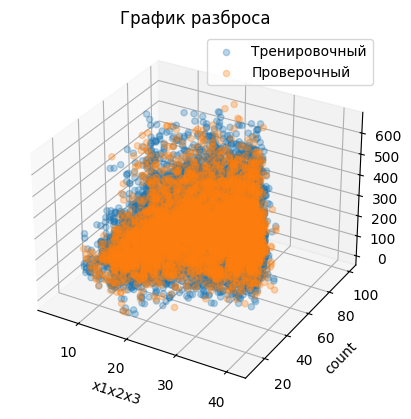

In [68]:


lin_model_x1x2x3 = linear_model.LinearRegression()

# Вычислить коэфф. на тренировочном наборе, т.е. обучить модель
lin_model_x1x2x3=lin_model_x1x2x3.fit(
    xTrain[['temp', 'humidity', 'hour']],
    yTrain[['count']]
)
y_pred_x1x2x3  = lin_model_x1x2x3.predict(xTest[['temp', 'humidity', 'hour']])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Получить вычисленные(predicted) зн. на проверочном наборе
#y_pred = fittedModel.predict(x_test)


ax.scatter(xTrain[['temp']], xTrain[['humidity']],  yTrain[['count']], alpha=0.3, label='Тренировочный') # тренировочный
ax.scatter(xTest[['temp']], xTest[['humidity']],  yTest[['count']],  alpha=0.3, label='Проверочный')   # проверочный
#...
label_str = "y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model_x1x2x3.coef_[0][0], lin_model_x1x2x3.intercept_[0])

#plt.plot( x_test[[ 'color_Digit']], y_pred_x1x2x3,
           # lw=2, color='red', label=label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('x1x2x3') # подпись осей
plt.ylabel(target[0])   # подпись осей
plt.title(u'График разброса'); # Заголовок

In [69]:
GET_METRICS_SINGLE(yTest, y_pred_x1x2x3)

MAE :    95.880 (средняя абсолютная ошибка)
MSE : 16,023.356594 (среднеквадратичная ошибка)
RMSE: 126.583398 (кв. корень из среднеквадратичной ошибки)
R2  :     0.348 (коэфф. детерминации)


## Модель m2. Нейронная сеть

In [70]:
totalHistoryLossTrain=[]
totalHistoryLossTest=[]
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(4 ,)))
model.add(tf.keras.layers.Dense(units=50,activation=None,))
model.add(tf.keras.layers.Activation(activation = tf.keras.activations.sigmoid,))
model.add(tf.keras.layers.Dense(units=50,activation=None,))
model.add(tf.keras.layers.Activation(activation = tf.keras.activations.sigmoid,))
model.add(tf.keras.layers.Dense(units=1,  activation=None))
fLoss=tf.keras.losses.MeanSquaredError()
fOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
fMetric=tf.keras.losses.MeanSquaredError()
model.compile(loss = fLoss, optimizer = fOptimizer, metrics = [fMetric])


In [71]:
dfXNorm.columns

Index(['temp', 'humidity', 'hour', 'year'], dtype='object')

In [72]:
# Осмотрим используемые для обучения столбцы исходной таблицы
xNorm_train [['temp', 'humidity', 'hour', 'year']]

,temp,humidity,hour,year
9820,0.333333,0.855556,0.782609,1.0
6866,0.466667,0.744444,0.608696,0.0
8067,0.266667,0.355556,0.478261,0.0
12409,0.600000,0.755556,0.260870,1.0
11183,0.377778,0.377778,0.478261,1.0
...,...,...,...,...
5480,0.755556,0.366667,0.608696,0.0
6995,0.288889,0.733333,1.000000,0.0
10376,0.355556,0.933333,0.173913,1.0
2181,0.288889,0.922222,0.217391,0.0


In [73]:
# Осмотрим используемые для обучения столбцы исходной таблицы
yNorm_train

,count
9820,0.294299
6866,0.100154
8067,0.220339
12409,0.241911
11183,0.249615
...,...
5480,0.687211
6995,0.078582
10376,0.010786
2181,0.004622


In [74]:
epochForTrain = 100

# 3) Цикл обучения/продолжения обучения сети

# Вызов метода для выполнения обучения (настройки коэфф. нейросети)
history = model.fit(

    xNorm_train [['temp', 'humidity', 'hour', 'year']],  # обучающие X  # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов
    yNorm_train,  # обучающие Y

    validation_data=(  # опционально: проверочные X и Y
        xNorm_test [['temp', 'humidity', 'hour', 'year']],  # требуется передать таблицу с кол-вом столбцов равным кол-ву входных нейронов
        yNorm_test),

    epochs=epochForTrain,   # кол-во эпох обучения
    #batch_size=100, # внутри каждой эпохи, проводить обучение пакетами/порциями по batch_size строк
    verbose=1,
)

# Дополнение полной истории обучения
totalHistoryLossTrain.extend(history.history['loss'])
if 'val_loss' in history.history.keys():
    totalHistoryLossTest.extend(history.history['val_loss'])

Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0576 - val_mean_squared_error: 0.0574
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0387 - val_mean_squared_error: 0.0388
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0318 - val_mean_squared_error: 0.0319
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_lo

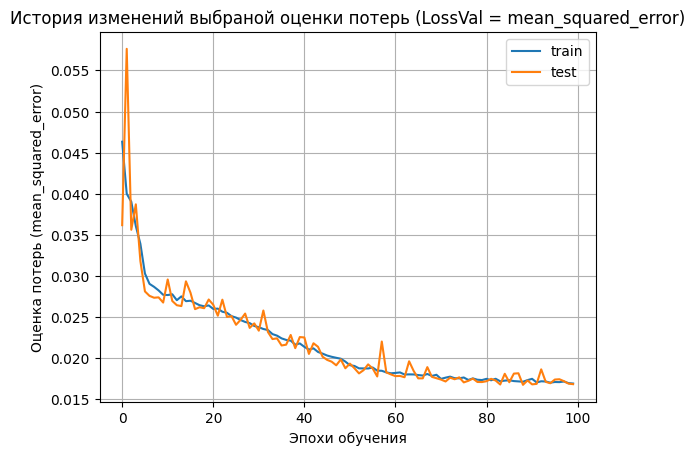

In [75]:
plt.plot(totalHistoryLossTrain, label='train', color = '#1f77b4')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test', color = '#ff7f0e')
plt.title("История изменений выбраной оценки потерь (LossVal = mean_squared_error)")
plt.ylabel("Оценка потерь (mean_squared_error)")
plt.xlabel("Эпохи обучения")
plt.legend()
plt.grid()
###plt.ylim ( (0, 0.03) ) # Область видимости для оси "Оценки потерь"

In [76]:
# Осмотрим последние значения выбраной оценки потерь (LossVal = mean_squared_error)
totalHistoryLossTrain[-5:]

[0.0171140618622303,
 0.017098961398005486,
 0.017173947766423225,
 0.016976695507764816,
 0.016926918178796768]

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MAE :     0.092 (средняя абсолютная ошибка)
MSE :  0.016853 (среднеквадратичная ошибка)
RMSE:  0.129817 (кв. корень из среднеквадратичной ошибки)
R2  :     0.711 (коэфф. детерминации)


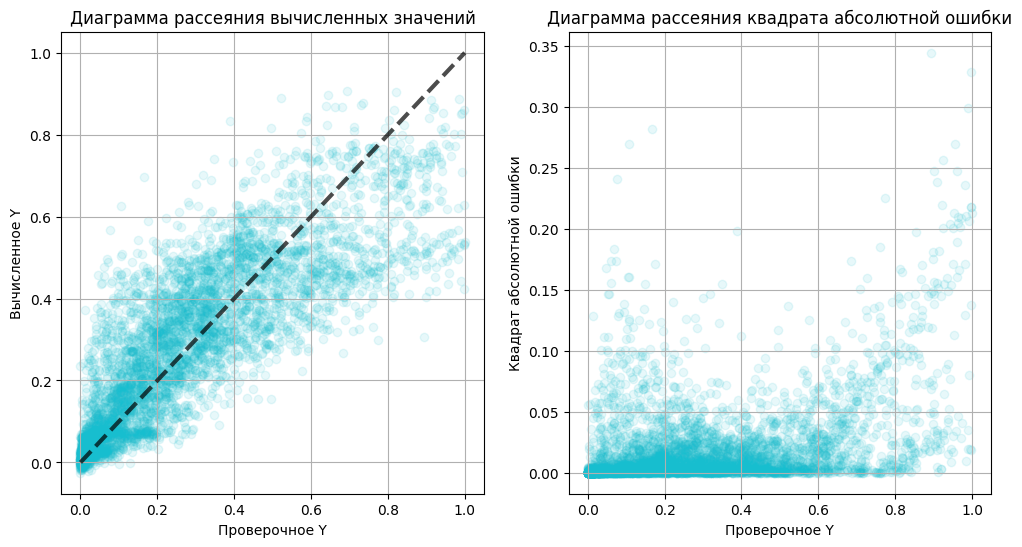

In [77]:
# Вычислить ответы НС на ПРОВЕРОЧНОЙ ЧАСТИ
yNorm_pred = model.predict( xNorm_test [['temp', 'humidity', 'hour', 'year']] ) # требуется передать таблицу с кол-вом столбцов равным кол-ву входных нейронов

# Вычислить метрики и построить графики, сравнивая ответы НС с ПРОВЕРОЧНОЙ ЧАСТЬЮ
GET_METRICS_SINGLE(yNorm_test, yNorm_pred) # Вычислить метрики точности
PLOT34(yNorm_test, yNorm_pred)   # Отобразить графики для вычисленных значений

In [78]:
yNorm_pred[0:5]

array([[0.09630291],
       [0.7211944 ],
       [0.4278128 ],
       [0.4934619 ],
       [0.05616649]], dtype=float32)

## Сохранение моделей

In [79]:
m1_dist = dict()
m1_dist["type"] = str(type(lin_model_x1x2x3))
m1_dist["normNeed"] = False
m1_dist["standartNeed"] = False
m1_dist["input"] = ['temp', 'humidity', 'hour']
m1_dist["output"] = ['count']
m1_dist["R2"] = metrics.r2_score(yTest[['count']], y_pred_x1x2x3)
m1_dist["RMSE"] = np.sqrt( metrics.mean_squared_error(yTest[['count']], y_pred_x1x2x3))
m1_dist["trainData"] = "bike-sharing-dataser-PREPARED.csv"
m1_dist["modelName"] = "m1.dump"


In [80]:
m1_file = open("./m1.json", "w")
json.dump(m1_dist, m1_file,  indent=3)
m1_file.close()


In [81]:
m2_dist = dict()
m2_dist["type"] = str(type(model))
m2_dist["normNeed"] = True
m2_dist["standartNeed"] = False
m2_dist["scalerNormForX"] = "scalerNormForX.dump"
m2_dist["scalerNormForY"] = "scalerNormForY.dump"
m2_dist["input"] = ['temp', 'humidity', 'hour', 'year']
m2_dist["output"] = ['count']
m2_dist["R2"] = metrics.r2_score(yNorm_test, yNorm_pred)
m2_dist["RMSE"] = np.sqrt( metrics.mean_squared_error(yNorm_test, yNorm_pred))
m2_dist["trainData"] = "bike-sharing-dataser-PREPARED.csv"
m2_dist["modelName"] = "m2.dump"


In [82]:
m2_file = open("./m2.json", "w")
json.dump(m2_dist, m2_file,  indent=4)
m2_file.close()


In [83]:
snx_file = open("./scalerNormForX.dump", "wb")
pickle.dump(scalerNormX, snx_file)
snx_file.close()
sny_file = open("./scalerNormForY.dump", "wb")
pickle.dump(scalerNormY, sny_file)
sny_file.close()


In [84]:
m1_out = open("./m1.dump", "wb")
pickle.dump(lin_model_x1x2x3, m1_out)
m1_out.close() 


In [85]:
model.save("m2.keras") 

In [86]:
m1_file = open("m1.json", "r")
m1_dist = json.load(m1_file)
m1_file.close()
m1_out = open("m1.dump", "rb")
m1 = pickle.load(m1_out)
m1_out.close()
dfX_test = pd.DataFrame(data = [[9.84, 81.0, 0.0]], columns = ['temp', 'humidity', 'hour'])
y_pred = m1.predict(dfX_test)
y_pred



array([[-11.36020675]])

In [87]:
m2_file = open("m2.json", "r")
m2_dist = json.load(m2_file)
m2_file.close()
m2=tf.keras.models.load_model("m2.keras")
snx_file = open("scalerNormForX.dump", "rb")
snx = pickle.load(snx_file)
snx_file.close()
sny_file = open("scalerNormForY.dump", "rb")
sny = pickle.load(sny_file)
sny_file.close()
dfX_test = pd.DataFrame(data = [[9.84, 81.0, 0.0, 0.0 ]], columns = ['temp', 'humidity', 'hour', 'year'])
y_pred=m2.predict(snx.transform(dfX_test))
y_pred=m2.predict(snx.transform(dfX_test))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.05249617]], dtype=float32)

In [88]:
row = dfX.iloc[5634]
print (row)

temp        27.06
humidity    78.00
hour         9.00
year         0.00
Name: 5634, dtype: float64


In [89]:
row = dfY.iloc[5634]
print (row)

count    189.0
Name: 5634, dtype: float64
